# Практична робота 2+
Лесняк Андрій, 559мн

### Завдання 1. Провести дослідження залежності середніх значень індикаторів ефективності (accuracy, precision, recall, f1) моделей від кількості ознак (n_features). Візуалізувати результати.

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Models
models = {'Dummy': DummyClassifier(strategy='uniform', random_state=1),
          'Forest': RandomForestClassifier(),
          'Log regr': LogisticRegression()}
# Indicators
indicators = ['accuracy', 'precision', 'recall', 'f1']

Зменшено кількість семплів, для швидшого обрахування. 

In [4]:
# Data
results = {metric: {name: [] for name in models.keys()} for metric in indicators}

for n in range(2, 11):
    print(f"Number of Features: {n}")
    
    X, у = make_classification(n_samples=5000,
                                n_features=n,
                                n_informative=n,
                                n_redundant=0,
                                n_classes=2,
                                n_clusters_per_class=1, 
                                random_state=1)

    for name, model in models.items():
        print(f"  Model: {name}")

        for metric in indicators:
            scores = cross_val_score(model, X, у, scoring=metric)
            avg_score = np.mean(scores)
            results[metric][name].append(avg_score)
            # print(f'  {metric}: {scores}') 
            print(f'  \033[1maverage {metric}: {avg_score}\033[0m')  # \033[BOLD_TEXT_HERE\033[0m'    

Number of Features: 2
  Model: Dummy
  average accuracy: 0.507
  average precision: 0.5062761506276151
  average recall: 0.4849699398797595
  average f1: 0.49539406345957004
  Model: Forest
  average accuracy: 0.8912000000000001
  average precision: 0.8790076919784013
  average recall: 0.9070140280561121
  average f1: 0.8929198533697825
  Model: Log regr
  average accuracy: 0.9064000000000002
  average precision: 0.8897307595913931
  average recall: 0.9274549098196394
  average f1: 0.9081760198291562
Number of Features: 3
  Model: Dummy
  average accuracy: 0.5064
  average precision: 0.5066945606694561
  average recall: 0.48439999999999994
  average f1: 0.4952965235173824
  Model: Forest
  average accuracy: 0.9644
  average precision: 0.9675101491465788
  average recall: 0.9623999999999999
  average f1: 0.9643189541622841
  Model: Log regr
  average accuracy: 0.944
  average precision: 0.9476065757701967
  average recall: 0.9399999999999998
  average f1: 0.9437730230173853
Number of Fe

<Figure size 640x480 with 0 Axes>

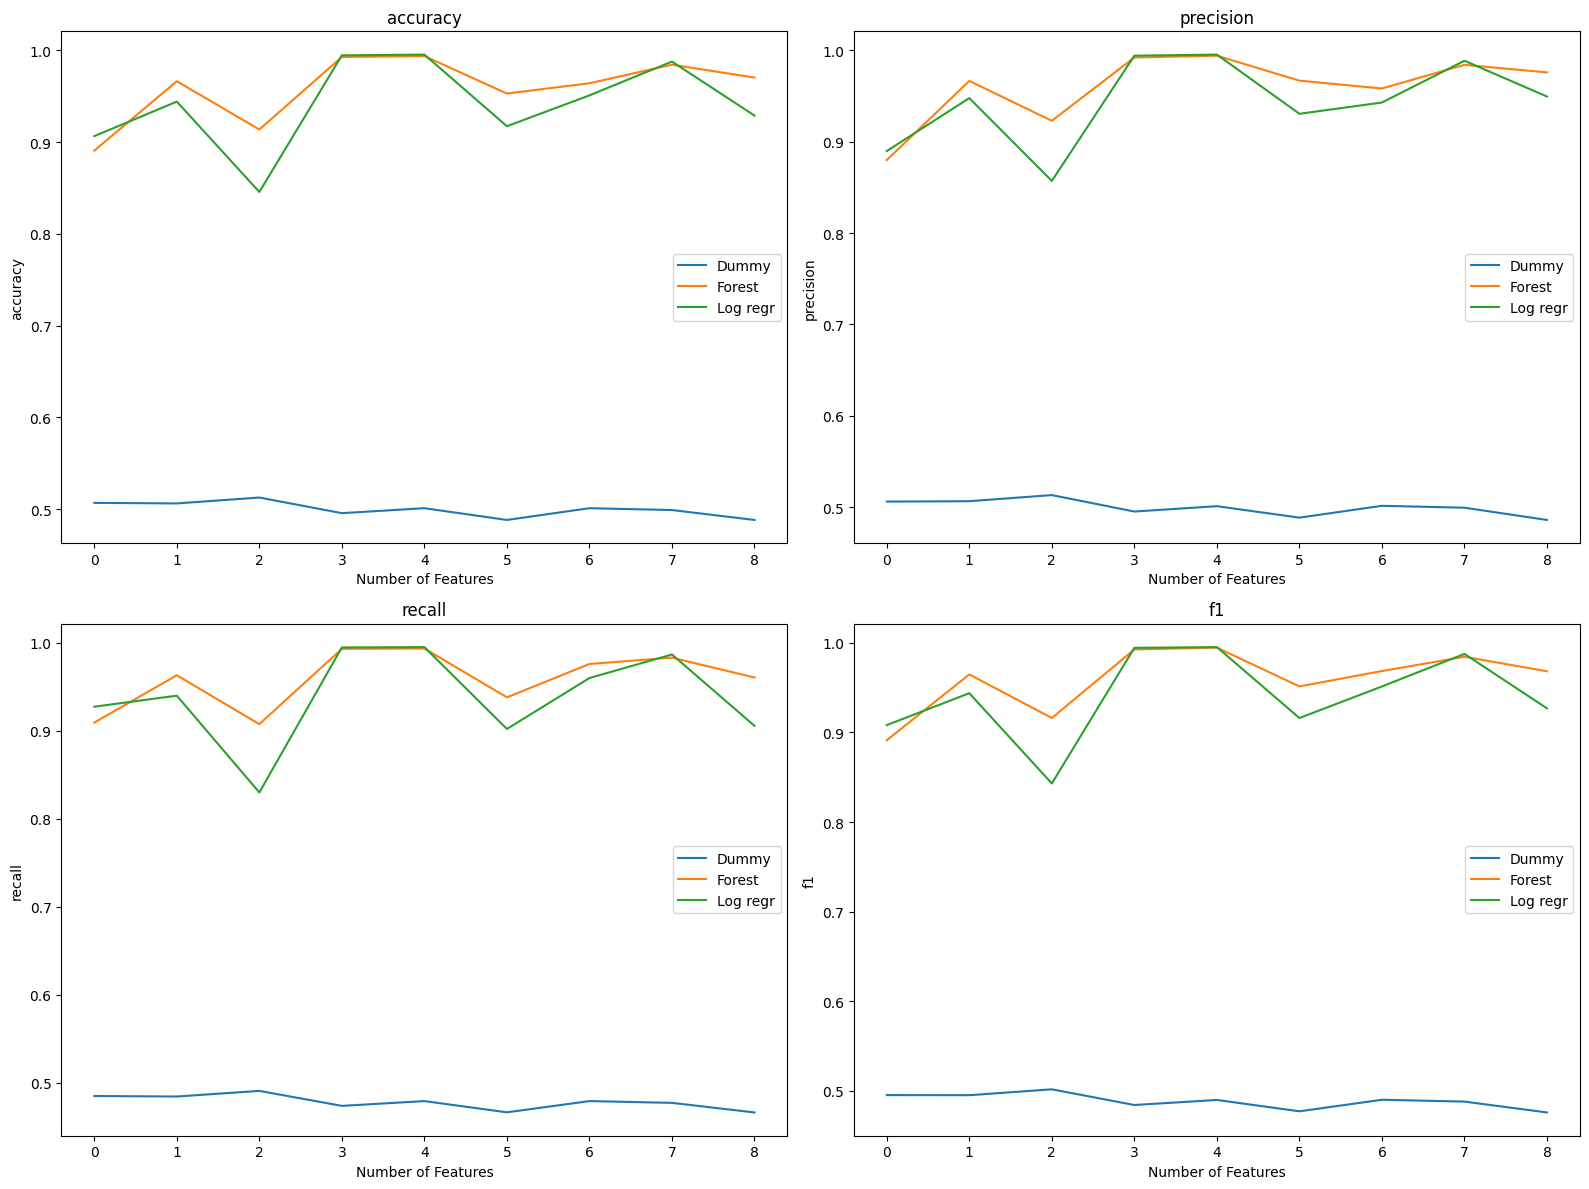

In [44]:
# Visualize
plt.figure()
plt.figure(figsize=(16, 12))

for metric in indicators:
    plt.subplot(2, 2, indicators.index(metric) + 1)
    plt.title(metric)
    for name in models.keys():
        plt.plot(results[metric][name], label=name)
    plt.xlabel('Number of Features')
    plt.ylabel(metric)
    # plt.xlim (0, 10)
    plt.legend()

plt.tight_layout()
plt.show()

### Завдання 2. Провести дослідження залежності середніх значення accuracy від n_splits.

In [45]:
# Data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [46]:
# Model
logit = LogisticRegression()
standardizer = StandardScaler()

pipeline = make_pipeline(standardizer, logit)

mean_accuracies = []

for i in range(2, 22):
    kf = KFold(n_splits=i, shuffle=True, random_state=1)
    cv_results = cross_val_score(pipeline,
                                 features,
                                 target,
                                 cv=kf,
                                 scoring="accuracy",
                                 n_jobs=-1) # use all CPU cores
    mean_accuracies.append(cv_results.mean())
    print(f"n_splits: {i}, Mean Accuracy: {cv_results.mean()}")


n_splits: 2, Mean Accuracy: 0.9666666666666667
n_splits: 3, Mean Accuracy: 0.9533333333333333
n_splits: 4, Mean Accuracy: 0.9530583214793742
n_splits: 5, Mean Accuracy: 0.9533333333333334
n_splits: 6, Mean Accuracy: 0.9533333333333333
n_splits: 7, Mean Accuracy: 0.9529993815708103
n_splits: 8, Mean Accuracy: 0.952485380116959
n_splits: 9, Mean Accuracy: 0.9526143790849674
n_splits: 10, Mean Accuracy: 0.9533333333333334
n_splits: 11, Mean Accuracy: 0.9525474525474528
n_splits: 12, Mean Accuracy: 0.952457264957265
n_splits: 13, Mean Accuracy: 0.9522144522144521
n_splits: 14, Mean Accuracy: 0.951948051948052
n_splits: 15, Mean Accuracy: 0.9533333333333334
n_splits: 16, Mean Accuracy: 0.9527777777777777
n_splits: 17, Mean Accuracy: 0.9526143790849673
n_splits: 18, Mean Accuracy: 0.9529320987654322
n_splits: 19, Mean Accuracy: 0.9520676691729324
n_splits: 20, Mean Accuracy: 0.9517857142857145
n_splits: 21, Mean Accuracy: 0.953231292517007


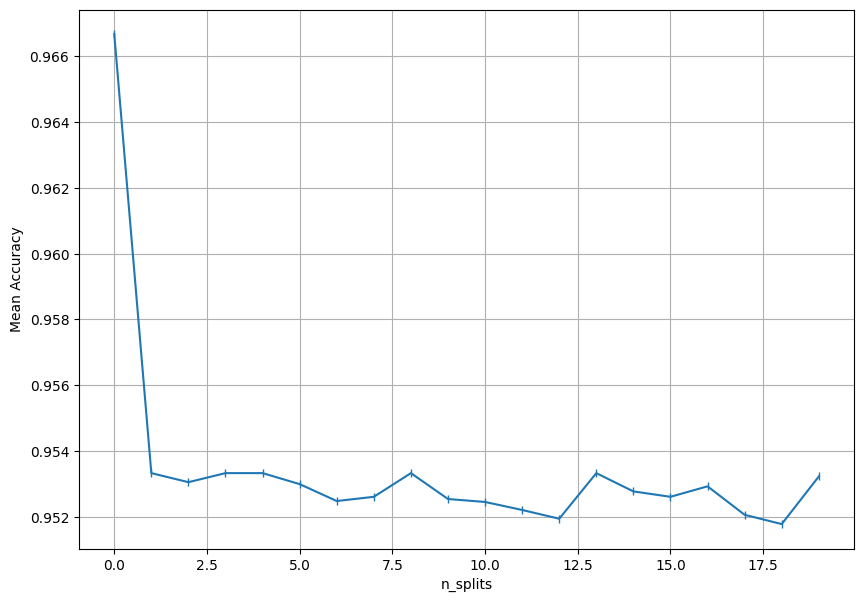

In [47]:
plt.figure(figsize=(10, 7))
plt.plot(mean_accuracies, marker = "|")

plt.xlabel('n_splits')
plt.ylabel('Mean Accuracy')
plt.grid(True)
# plt.ylim(0.5, 1)
plt.show()